In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
df=pd.read_excel("Usa automotive sale.xlsx") 

In [3]:
df.head()

,Month,Sales Unit
0,2005-01-01,1052224
1,2005-02-01,1244753
2,2005-03-01,1564938
3,2005-04-01,1493837
4,2005-05-01,1488171


In [4]:
df.set_index('Month',inplace=True)

In [5]:
df.head()

,Sales Unit
Month,
2005-01-01,1052224
2005-02-01,1244753
2005-03-01,1564938
2005-04-01,1493837
2005-05-01,1488171


In [6]:
df.describe()

,Sales Unit
count,1.800000e+02
mean,1.281917e+06
std,2.476757e+05
min,6.506080e+05
25%,1.136237e+06
50%,1.317078e+06
75%,1.472904e+06
max,2.115420e+06


<AxesSubplot:xlabel='Month'>

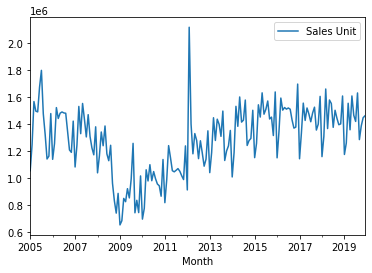

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
test_result=adfuller(df['Sales Unit'])

In [10]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales Unit'])

ADF Test Statistic : -1.3706019946219126
p-value : 0.5962859568124471
#Lags Used : 14
Number of Observations Used : 165
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
df['Sales First Difference'] = df['Sales Unit'] - df['Sales Unit'].shift(1)

In [13]:
df['Sales Unit'].shift(1)

Month
2005-01-01          NaN
2005-02-01    1052224.0
2005-03-01    1244753.0
2005-04-01    1564938.0
2005-05-01    1493837.0
                ...    
2019-08-01    1417418.0
2019-09-01    1628577.0
2019-10-01    1282712.0
2019-11-01    1384010.0
2019-12-01    1445173.0
Name: Sales Unit, Length: 180, dtype: float64

In [14]:
df['Seasonal First Difference']=df['Sales Unit']-df['Sales Unit'].shift(1)

In [15]:
df.head(14)

,Sales Unit,Sales First Difference,Seasonal First Difference
Month,,,
2005-01-01,1052224,NaN,NaN
2005-02-01,1244753,192529.0,192529.0
2005-03-01,1564938,320185.0,320185.0
2005-04-01,1493837,-71101.0,-71101.0
2005-05-01,1488171,-5666.0,-5666.0
2005-06-01,1671401,183230.0,183230.0
2005-07-01,1795944,124543.0,124543.0
2005-08-01,1474130,-321814.0,-321814.0
2005-09-01,1321156,-152974.0,-152974.0


In [16]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.5656845693892105
p-value : 0.006451988105551173
#Lags Used : 13
Number of Observations Used : 165
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no is stationary


<AxesSubplot:xlabel='Month'>

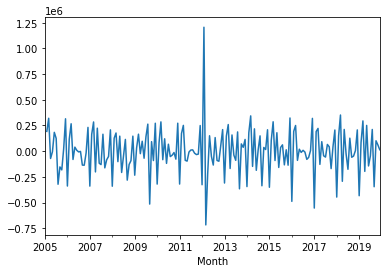

In [17]:
df['Seasonal First Difference'].plot()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

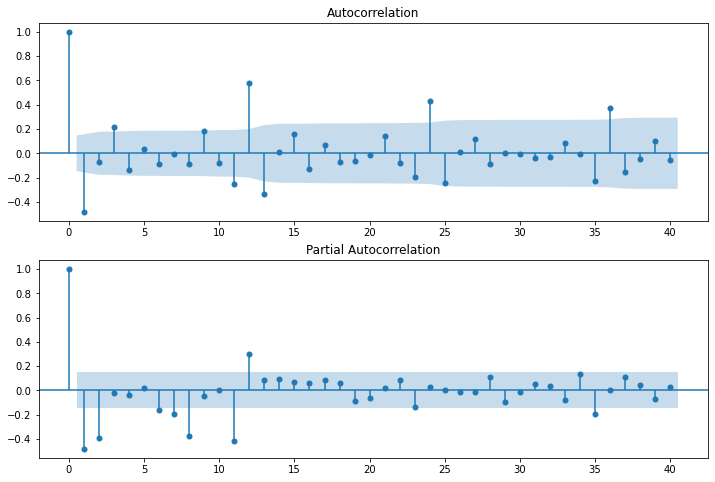

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[2:],lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=ARIMA(df['Sales Unit'],order=(1,1,0))
model_fit=model.fit()

C:\Users\ABHISHEKagnihotri\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ABHISHEKagnihotri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so 

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Sales Unit   No. Observations:                  179
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2431.798
Method:                       css-mle   S.D. of innovations         192110.530
Date:                Sat, 26 Jun 2021   AIC                           4869.596
Time:                        16:47:37   BIC                           4879.158
Sample:                    02-01-2005   HQIC                          4873.473
                         - 12-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2273.4078   9783.928      0.232      0.816   -1.69e+04    2.14e+04
ar.L1.D.Sales Unit    -0.4703      0.066     -7.152      0.000      -0.599      -0.341
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1264           +0.0000j            2.1264            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

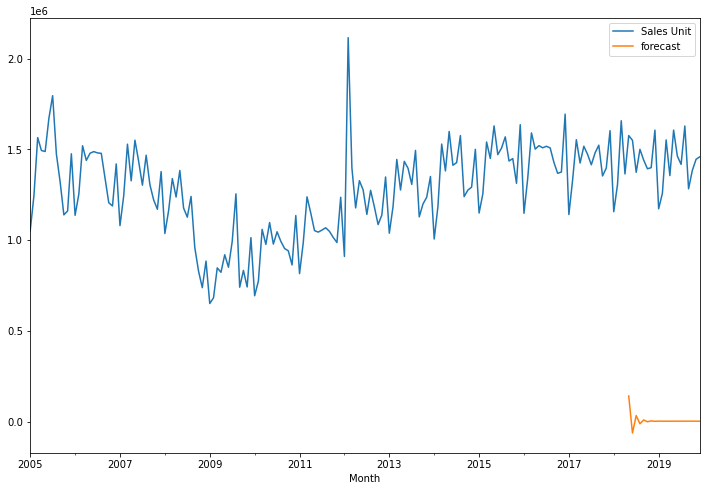

In [23]:
df['forecast']=model_fit.predict(start=160,end=179,dynamic=True)
df[['Sales Unit','forecast']].plot(figsize=(12,8))

In [24]:
import statsmodels.api as sm

In [25]:
model=sm.tsa.statespace.SARIMAX(df['Sales Unit'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ABHISHEKagnihotri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ABHISHEKagnihotri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

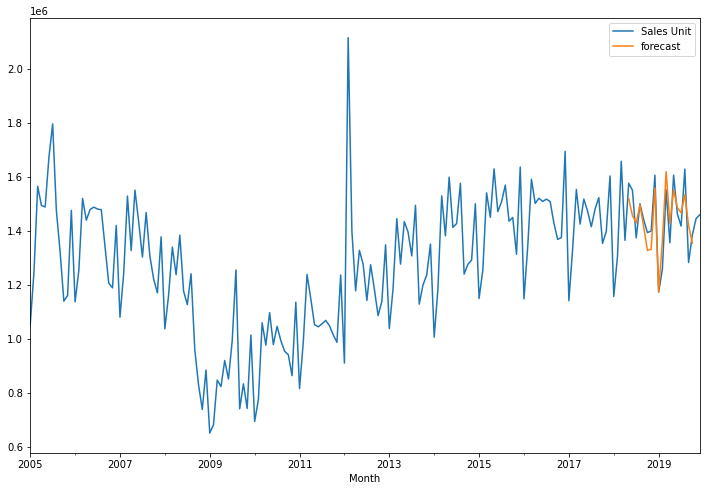

In [26]:
df['forecast']=results.predict(start=160,end=177,dynamic=True)
df[['Sales Unit','forecast']].plot(figsize=(12,8))

In [27]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [28]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [29]:
future_datest_df.tail()

,Sales Unit,Sales First Difference,Seasonal First Difference,forecast
2021-07-01,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN
2021-11-01,NaN,NaN,NaN,NaN


In [30]:
future_df=pd.concat([df,future_datest_df])

In [31]:
future_df

,Sales Unit,Sales First Difference,Seasonal First Difference,forecast
2005-01-01,1052224,NaN,NaN,NaN
2005-02-01,1244753,192529.0,192529.0,NaN
2005-03-01,1564938,320185.0,320185.0,NaN
2005-04-01,1493837,-71101.0,-71101.0,NaN
2005-05-01,1488171,-5666.0,-5666.0,NaN
...,...,...,...,...
2021-07-01,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

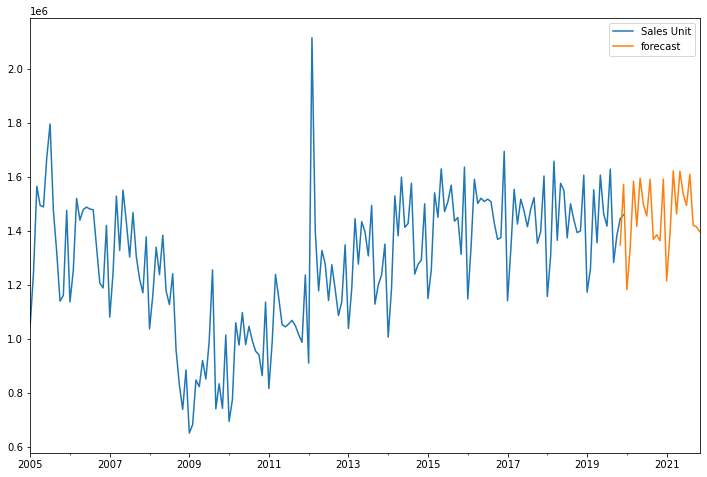

In [32]:
future_df['forecast'] = results.predict(start = 178, end = 204, dynamic= True)  
future_df[['Sales Unit', 'forecast']].plot(figsize=(12, 8)) 

In [33]:
Actual=df[['Sales Unit']][160:178]

In [34]:
predicted=results.predict(start=160,end=177,dynamic=True)


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
np.sqrt(mean_squared_error(Actual,predicted))

67633.66324548719

In [37]:
from sklearn import metrics

In [38]:
MAE=metrics.mean_absolute_error(Actual,predicted)
MSE=metrics.mean_squared_error(Actual,predicted)
RMSE=np.sqrt(MSE)

In [39]:
MAE

58391.02926445207

In [40]:
MSE

4574312404.003965

In [41]:
RMSE

67633.66324548719

In [42]:
Actual

,Sales Unit
Month,
2018-05-01,1576158
2018-06-01,1549950
2018-07-01,1373655
2018-08-01,1500121
2018-09-01,1440820
2018-10-01,1393137
2018-11-01,1399187
2018-12-01,1605973
2019-01-01,1172653


In [43]:
predicted

2018-05-01    1.518651e+06
2018-06-01    1.456165e+06
2018-07-01    1.429081e+06
2018-08-01    1.495487e+06
2018-09-01    1.415249e+06
2018-10-01    1.327230e+06
2018-11-01    1.331873e+06
2018-12-01    1.558539e+06
2019-01-01    1.173405e+06
2019-02-01    1.363007e+06
2019-03-01    1.619452e+06
2019-04-01    1.426269e+06
2019-05-01    1.551854e+06
2019-06-01    1.485802e+06
2019-07-01    1.466926e+06
2019-08-01    1.533586e+06
2019-09-01    1.420012e+06
2019-10-01    1.354109e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [49]:
predicted=results.predict(start=178,end=204,dynamic=True)


In [51]:
predicted

2019-11-01    1.347412e+06
2019-12-01    1.571816e+06
2020-01-01    1.182131e+06
2020-02-01    1.336646e+06
2020-03-01    1.583949e+06
2020-04-01    1.416405e+06
2020-05-01    1.594713e+06
2020-06-01    1.497027e+06
2020-07-01    1.454687e+06
2020-08-01    1.590621e+06
2020-09-01    1.367845e+06
2020-10-01    1.385271e+06
2020-11-01    1.363133e+06
2020-12-01    1.591593e+06
2021-01-01    1.213778e+06
2021-02-01    1.387186e+06
2021-03-01    1.621664e+06
2021-04-01    1.462003e+06
2021-05-01    1.620650e+06
2021-06-01    1.535431e+06
2021-07-01    1.493880e+06
2021-08-01    1.609387e+06
2021-09-01    1.420035e+06
2021-10-01    1.414686e+06
2021-11-01    1.396475e+06
2021-12-01    1.626037e+06
2022-01-01    1.251444e+06
Freq: MS, Name: predicted_mean, dtype: float64